In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Contras Stretching

### 1. Load and Show image

In [4]:
img = cv2.imread('HW2_Q3_chest.tif', cv2.IMREAD_ANYDEPTH)

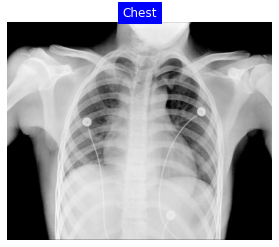

In [19]:
# disable x & y axis
plt.axis('off')
plt.title('Chest', color='white', backgroundcolor='blue')
plt.imshow(img, cmap = 'gray', vmin=0, vmax=2**16-1)

### 2. Data type and dimensions

In [31]:
img.dtype

dtype('uint16')

In [30]:
img.shape

(493, 600)

### 3. Define constrast stretching function

In [109]:
def constrast_stretching(_img, _plot=True):
    n_bytes = _img.itemsize
    # Assign possible min and max values based on the number of bits
    a, b = 0, 2**(n_bytes*8)-1
    # Assign actual min and max values for intensity in the image
    c, d = _img.min(), _img.max()
    stretched_img = np.zeros(shape=_img.shape, dtype=img.dtype)
    # Perform stretching
    for i in range(_img.shape[0]):
        for j in range(_img.shape[1]):
            stretched_img[i, j] = int((_img[i, j] - c)*((b - a)/(d - c)) + a)
    # stretched_img = stretched_img.astype(img.dtype)

    if _plot:
        # show image
        plt.axis('off')
        plt.title('Chest', color='white', backgroundcolor='blue')
        plt.imshow(stretched_img, cmap = 'gray', vmin=0, vmax=2**16-1)

    return stretched_img

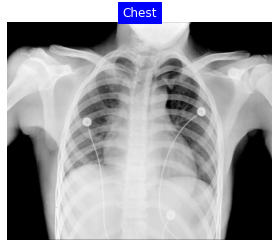

In [110]:
stretched_img = constrast_stretching(img)

### Plot images and their histograms

Text(0.5, 1.0, 'Stretched Histogram')

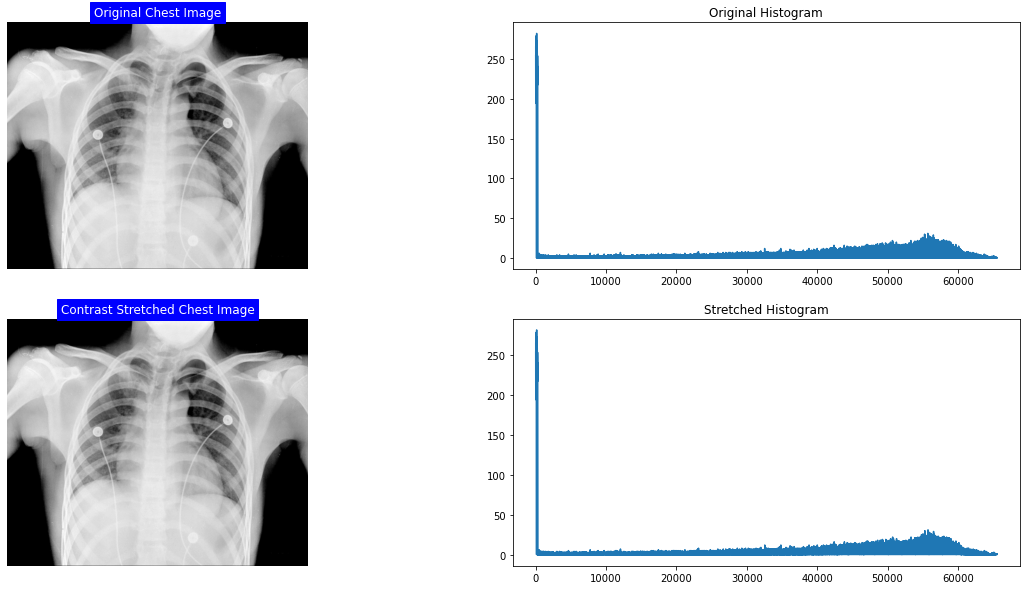

In [112]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

# Plot original image and its histogram
## disable x & y axis
ax[0][0].axis('off')
ax[0][0].set_title('Original Chest Image', color='white', backgroundcolor='blue')
ax[0][0].imshow(img, cmap = 'gray', vmin=0, vmax=2**16-1)

original_hist = cv2.calcHist([img], [0], None, [2**16], [0, 2**16])

ax[0][1].plot(original_hist)
ax[0][1].set_title('Original Histogram')

# Plot contrast stretched image and its histogram
## disable x & y axis
stretched_img = constrast_stretching(img, False)
ax[1][0].axis('off')
ax[1][0].set_title('Contrast Stretched Chest Image', color='white', backgroundcolor='blue')
ax[1][0].imshow(stretched_img, cmap = 'gray', vmin=0, vmax=2**16-1)

stretched_hist = cv2.calcHist([stretched_img], [0], None, [2**16], [0, 2**16])

ax[1][1].plot(stretched_hist)
ax[1][1].set_title('Stretched Histogram')